Мои значения $C_x, C_y, C_z$ не совпадают со значениями из папки `results`. Это из-за того, что мои расчёты не учитывают трение.   

Идея!    

Из значений из папки `results` выразить значения $C_x, C_y, C_z$, обусловленные только давлением, и сравнить их с моими значениями.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


# для работы с файлами
import glob

# для работы с моим интегратором
import my3D_surface_integrator as sint

# для отслеживания прогресса
from tqdm import tqdm

# Шаг 1: скоростной напор

Должно быть так:  
$$k = \frac{\rho V^2}{2} \cdot S = \frac{(F_{sum})_x}{C_x} = \frac{(F_{sum})_y}{C_y} = \frac{(F_{sum})_z}{C_z}$$  
Проверим это.

In [2]:
regimes = (pd.read_csv("./data/regimes.csv")).drop(['Num'],axis=1)

Fsum_xyz = pd.DataFrame(columns=['Fx', 'Fy', 'Fz'], data=np.zeros((regimes.shape[0],3)))
sum_coefCxyz = pd.DataFrame(columns=['Cx', 'Cy', 'Cz'], data=np.zeros((regimes.shape[0],3)))


files = glob.glob("results/*_*_*")
files.sort()
for i,path in tqdm(enumerate(files)):
    f = open(path, mode='r')

    l = f.readlines()[19]
    sep_words = l.split()
    
    Fsum_xyz.iloc[i][0] = float(sep_words[-4])
    Fsum_xyz.iloc[i][1] = float(sep_words[-3])
    Fsum_xyz.iloc[i][2] = float(sep_words[-2])   
    f.close()
    
    f = open(path, mode='r')
    l = f.readlines()[22]
    sep_words = l.split()
    sum_coefCxyz.iloc[i][0] = float(sep_words[-3])
    sum_coefCxyz.iloc[i][1] = float(sep_words[-2])
    sum_coefCxyz.iloc[i][2] = float(sep_words[-1])    

    f.close()

64it [00:00, 1098.17it/s]


In [4]:
Fsum_xyz

,Fx,Fy,Fz
0,-431.481,1546.460,-772.548
1,-109.730,620.910,-598.760
2,-354.197,-3452.650,-671.944
3,-210.768,-3212.720,-617.210
4,-214.190,-2508.050,-651.033
...,...,...,...
59,-281.026,-3364.970,-644.243
60,-97.005,-1423.820,-556.964
61,-163.129,1103.820,-630.015
62,-384.998,-3458.090,-706.648


In [5]:
# посчитаем коэффициент k
velocity_head = Fsum_xyz.to_numpy() / sum_coefCxyz.to_numpy()

In [6]:
velocity_head

array([[-5173.74475708, -5173.73354834, -5173.73979547],
       [-4562.59693387, -4562.56245958, -4562.57191408],
       [-4400.2907049 , -4400.29822594, -4400.30385583],
       [-4577.08720154, -4577.0914629 , -4577.07937826],
       [-4909.10174371, -4909.09162085, -4909.08473963],
       [-4591.50256388, -4591.48163559, -4591.46806482],
       [-4801.77993528, -4801.77436715, -4801.79571346],
       [-4676.95913128, -4676.96360027, -4676.96243128],
       [-4548.08406639, -4548.07636997, -4548.09784863],
       [-4415.26336233, -4415.246961  , -4415.24275591],
       [-5113.07621955, -5113.04405564, -5113.06486494],
       [-5012.89660125, -5012.90087411, -5012.89566237],
       [-5125.31416736, -5125.29566399, -5125.30511454],
       [-4662.83794871, -4662.86002398, -4662.84845859],
       [-4961.42591115, -4961.43663797, -4961.43326457],
       [-5075.90007747, -5075.89046782, -5075.88228328],
       [-4788.10265717, -4788.08439678, -4788.0986497 ],
       [-4385.27982343, -4385.2

In [7]:
equality = [
    np.isclose(velocity_head[:,0], velocity_head[:,1]).all(),
    np.isclose(velocity_head[:,0], velocity_head[:,2]).all(),
    np.isclose(velocity_head[:,1], velocity_head[:,2]).all()
]
equality

[True, True, True]

отлично. Всё как и предсказывала теория.
Получим скоростной напор для каждого прецидента

In [8]:
rhoV22S = np.mean(velocity_head, axis=1)
rhoV22S

array([-5173.73936696, -4562.57710251, -4400.29759555, -4577.08601423,
       -4909.09270139, -4591.4840881 , -4801.78333863, -4676.96172094,
       -4548.086095  , -4415.25102641, -5113.06171338, -5012.89771258,
       -5125.30498196, -4662.84881043, -4961.4319379 , -5075.89094285,
       -4788.09523455, -4385.28716461, -5050.89239857, -5088.37380334,
       -4691.0627803 , -5149.65971872, -5161.73833989, -5137.49310689,
       -4855.85188518, -4732.96400663, -5185.75252453, -4430.24212675,
       -4339.94392144, -4987.27231137, -4620.20294575, -4895.83549918,
       -4518.89376339, -5000.09196569, -4774.39908778, -4355.07148019,
       -4705.07445465, -5100.71477513, -4370.17590889, -4842.42619781,
       -4935.34669042, -4974.34843622, -4815.35840641, -4474.76783659,
       -4324.69114503, -4719.01487903, -4746.80697852, -4445.1159585 ,
       -4605.83310391, -4869.19868101, -4922.24030933, -5038.24929421,
       -4533.48235125, -4948.43595129, -5063.41504053, -4489.50398791,
      

# Шаг 2: силы давления

Силы давления = Суммарные силы - силы трения


Сначала вытянем суммарные силы на крыле и силы трения на крыле

In [9]:
Ffric_wing = pd.DataFrame(columns=['Ffricx', 'Ffricy', 'Ffricz'], data=np.zeros((regimes.shape[0],3)))
F_wing = pd.DataFrame(columns=['Fx', 'Fy', 'Fz'], data=np.zeros((regimes.shape[0],3)))



files = glob.glob("results/*_*_*")
files.sort()
for i,path in tqdm(enumerate(files)):
    f = open(path, mode='r')

    l = f.readlines()[10]
    sep_words = l.split()
    
    Ffric_wing.iloc[i][0] = float(sep_words[-4])
    Ffric_wing.iloc[i][1] = float(sep_words[-3])
    Ffric_wing.iloc[i][2] = float(sep_words[-2])   
    f.close()
    
    f = open(path, mode='r')

    l = f.readlines()[5]
    sep_words = l.split()
    
    F_wing.iloc[i][0] = float(sep_words[-4])
    F_wing.iloc[i][1] = float(sep_words[-3])
    F_wing.iloc[i][2] = float(sep_words[-2])   
    f.close()

64it [00:00, 1050.79it/s]


In [10]:
F_wing

,Fx,Fy,Fz
0,-340.7100,1319.810,-106.2280
1,-67.9984,549.636,-107.6330
2,-252.4320,-2883.930,164.2310
3,-138.4780,-2753.020,155.0050
4,-145.9950,-2157.900,127.1390
...,...,...,...
59,-196.0910,-2876.100,169.7280
60,-53.2013,-1209.810,57.4249
61,-112.6100,962.169,-142.6840
62,-283.8100,-2939.560,200.2170


In [11]:
Ffric_wing

,Ffricx,Ffricy,Ffricz
0,-27.0227,-0.665014,0.472939
1,-23.8452,-0.009995,-0.241992
2,-18.1402,0.528957,-2.448490
3,-23.4295,0.396081,-0.457794
4,-24.4843,0.406527,-0.079187
...,...,...,...
59,-21.9693,0.375083,-1.154490
60,-25.8730,0.194101,0.619151
61,-22.1411,-0.023013,-1.081790
62,-22.6879,0.699842,-0.872064


Теперь получим сами силы давления

In [12]:
PressureForce = pd.DataFrame(columns=['Fpx', 'Fpy', 'Fpz'], 
                             data=F_wing.to_numpy() - Ffric_wing.to_numpy())
PressureForce

,Fpx,Fpy,Fpz
0,-313.6873,1320.475014,-106.700939
1,-44.1532,549.645995,-107.391008
2,-234.2918,-2884.458957,166.679490
3,-115.0485,-2753.416081,155.462794
4,-121.5107,-2158.306527,127.218187
...,...,...,...
59,-174.1217,-2876.475083,170.882490
60,-27.3283,-1210.004101,56.805749
61,-90.4689,962.192013,-141.602210
62,-261.1221,-2940.259842,201.089064


# Шаг 3: безразмерные коэффициенты сил давления

Ранее мы получили чистые силы давления, действующие на крыло. Если обезразмерить их на скоростной напор, то мы получим наши безразмерные коэффициенты сил давления.

In [13]:
PressureForceCoef = pd.DataFrame(columns=['Cx', 'Cy', 'Cz'],
                                 data=PressureForce.to_numpy() / rhoV22S.reshape((rhoV22S.shape[0],1))
                                )
PressureForceCoef

,Cx,Cy,Cz
0,0.060631,-0.255226,0.020624
1,0.009677,-0.120468,0.023537
2,0.053245,0.655515,-0.037879
3,0.025136,0.601565,-0.033965
4,0.024752,0.439655,-0.025915
...,...,...,...
59,0.037456,0.618776,-0.036760
60,0.006067,0.268636,-0.012612
61,0.019521,-0.207618,0.030554
62,0.053480,0.602193,-0.041185


In [40]:
PressureForceCoef.to_csv('./Pressure condtitioned Force Coefficients', index=True)

# Шаг 3.5 Update: Вычисление безразмерных коэффициентов сил, обусловленных И давлением, И трением, действующих на крыло

Теперь нам нужны коэффициенты $C_x, C_y, C_z$, обусловленные совместным действием сил давления и трения.
Для получения этих значений сначала посчитаем суммарную силу сил давления и трения (по факту это уже посчитано) и разделим эту силу на скоростной напор

In [14]:
PressureForceCoef_by_PressAndFric = pd.DataFrame(columns=['Cx', 'Cy', 'Cz'],
                                                 data=F_wing.to_numpy() / rhoV22S.reshape((rhoV22S.shape[0],1))
                                                )
PressureForceCoef_by_PressAndFric

,Cx,Cy,Cz
0,0.065854,-0.255098,0.020532
1,0.014904,-0.120466,0.023590
2,0.057367,0.655394,-0.037323
3,0.030255,0.601479,-0.033865
4,0.029740,0.439572,-0.025899
...,...,...,...
59,0.042182,0.618695,-0.036511
60,0.011811,0.268593,-0.012749
61,0.024298,-0.207613,0.030788
62,0.058127,0.602050,-0.041006


In [15]:
PressureForceCoef_by_PressAndFric.to_csv('./Pressure and Friction Conditioned Force Wing Coefficients', index=True)

# Шаг 4: сравнение полученых значений с моими интегральными величинами

In [30]:
#  считаем наши посчитанные данные
AAA_df = pd.read_csv("./my_CxCyCz_lab", index_col=0)
my_Cx_n_lab = AAA_df['Cx']
my_Cy_n_lab = AAA_df['Cy']
my_Cz_n_lab = AAA_df['Cz']

my_Cx_n_spd = np.zeros(sum_coefCxyz.shape[0])
my_Cy_n_spd = np.zeros(sum_coefCxyz.shape[0])
my_Cz_n_spd = np.zeros(sum_coefCxyz.shape[0])

CICLES = sum_coefCxyz.shape[0]
for i in tqdm(range(CICLES)):
    Cx, Cy, Cz = sint.LabSys2SpdSys_CxCyCz(my_Cx_n_lab[i], my_Cy_n_lab[i], my_Cz_n_lab[i], 
                                           AngAt=regimes['alpha'][i], debug=False)
    
    my_Cx_n_spd[i] = Cx
    my_Cy_n_spd[i] = Cy
    my_Cz_n_spd[i] = Cz
    
MY_PressureForceCoef = pd.DataFrame(columns=['Cx', 'Cy', 'Cz'],
                                    data=np.array([my_Cx_n_spd,my_Cy_n_spd,my_Cz_n_spd]).T)

100%|██████████| 64/64 [00:00<00:00, 23884.28it/s]


In [31]:
PressureForceCoef

,Cx,Cy,Cz
0,0.083398,-0.298906,0.149321
1,0.024050,-0.136088,0.131233
2,0.080494,0.784640,0.152704
3,0.046048,0.701913,0.134848
4,0.043631,0.510899,0.132618
...,...,...,...
59,0.060453,0.723859,0.138587
60,0.021536,0.316106,0.123653
61,0.035199,-0.238177,0.135942
62,0.078851,0.708251,0.144728


In [32]:
MY_PressureForceCoef

,Cx,Cy,Cz
0,0.059316,-0.251068,0.019553
1,0.008998,-0.118338,0.022502
2,0.055297,0.645895,-0.032265
3,0.028154,0.592261,-0.027000
4,0.026495,0.432933,-0.021124
...,...,...,...
59,0.040119,0.609278,-0.030135
60,0.006485,0.264588,-0.010445
61,0.018805,-0.203956,0.029541
62,0.055804,0.592834,-0.034673


MAE = 0.004257842847136817
RMSE = 0.0017076127086115215


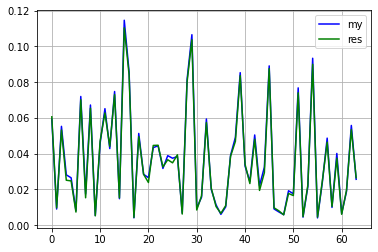

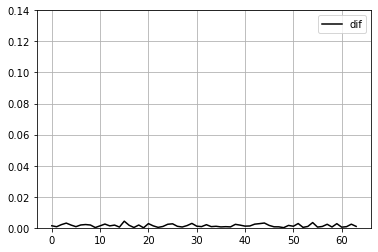

In [37]:
#Cx
print(f"MAE = {np.max(np.abs(MY_PressureForceCoef['Cx'] - PressureForceCoef['Cx']))}")
print(f"RMSE = {np.sqrt(np.mean((np.abs(MY_PressureForceCoef['Cx'] - PressureForceCoef['Cx']))**2))}")

plt.plot(MY_PressureForceCoef['Cx'], color='blue', label='my')
plt.plot(PressureForceCoef['Cx'], color='green', label='res')
plt.grid()
plt.legend()
plt.show()

plt.plot(np.abs(MY_PressureForceCoef['Cx'] - PressureForceCoef['Cx']), color='black', label='dif')
plt.ylim(-0.0, 0.14)
plt.legend()
plt.grid()

MAE = 0.012514135311404773
RMSE = 0.006855899907759874


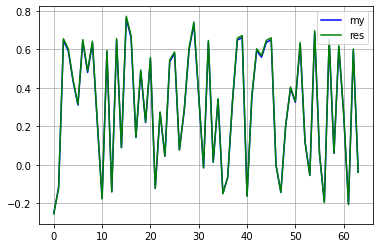

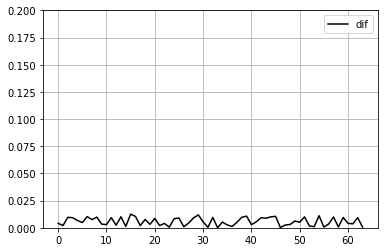

In [38]:
#Cy
print(f"MAE = {np.max(np.abs(MY_PressureForceCoef['Cy'] - PressureForceCoef['Cy']))}")
print(f"RMSE = {np.sqrt(np.mean((np.abs(MY_PressureForceCoef['Cy'] - PressureForceCoef['Cy']))**2))}")


plt.plot(MY_PressureForceCoef['Cy'], color='blue', label='my')
plt.plot(PressureForceCoef['Cy'], color='green', label='res')
plt.grid()
plt.legend()
plt.show()

plt.plot(np.abs(MY_PressureForceCoef['Cy'] - PressureForceCoef['Cy']), color='black', label='dif')
plt.ylim(-0.0, 0.2)
plt.legend()
plt.grid()

MAE = 0.011194292556991302
RMSE = 0.0046045326260522245


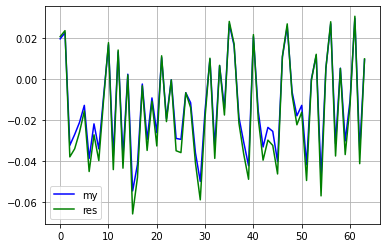

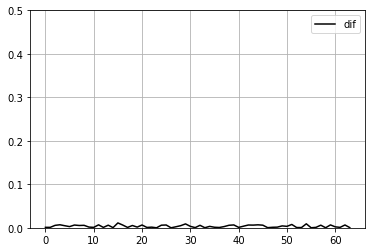

In [39]:
#Cz
print(f"MAE = {np.max(np.abs(MY_PressureForceCoef['Cz'] - PressureForceCoef['Cz']))}")
print(f"RMSE = {np.sqrt(np.mean((np.abs(MY_PressureForceCoef['Cz'] - PressureForceCoef['Cz']))**2))}")


plt.plot(MY_PressureForceCoef['Cz'], color='blue', label='my')
plt.plot(PressureForceCoef['Cz'], color='green', label='res')
plt.grid()
plt.legend()
plt.show()

plt.plot(np.abs(MY_PressureForceCoef['Cz'] - PressureForceCoef['Cz']), color='black', label='dif')
plt.ylim(-0.0, 0.5)
plt.legend()
plt.grid()

Отлично! Задача решена!